# The Sparks Foundation- GRIPSEPT21

###### Data Science & Buisness Analytics Internship

### Done by : Mohammed Shamhan

# Task-1 Prediction using Supervised ML

###### " Predict the percentage of an student based on the no. of study hours using Python/R/SAS "

## Simple Linear Regression

### Importing libaries

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  

### Reading the given data set

In [2]:
url = "http://bit.ly/w-data"
f_data = pd.read_csv(url)
print("Displaying the first 10 students")
f_data.head(10)

Displaying the first 10 students


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data exploration

In [3]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
f_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data visualization

<AxesSubplot:>

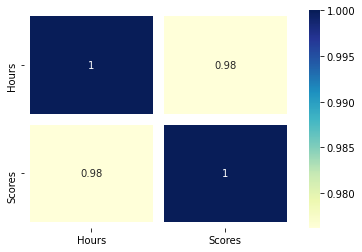

In [5]:
sns.heatmap(f_data.corr(), cmap="YlGnBu", annot = True ,linewidths=10)

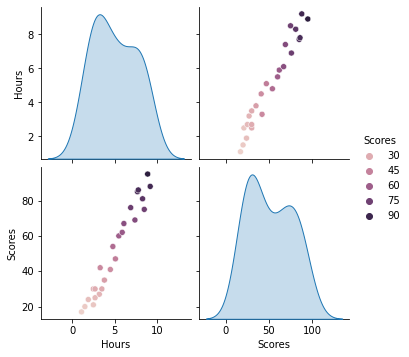

In [6]:
sns.pairplot(f_data,diag_kind='kde', hue="Scores", diag_kws=dict(hue=None),vars =['Hours','Scores'])

### Visualizing the dataset


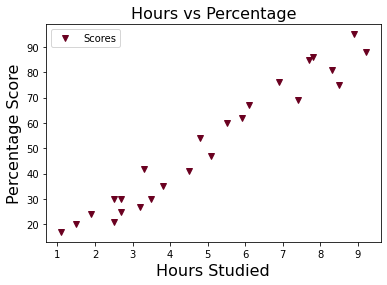

In [7]:
f_data.plot(x='Hours', y='Scores',style='v',c='#6a0020')
plt.title('Hours vs Percentage',size = 16,)  
plt.xlabel('Hours Studied', size = 16)  
plt.ylabel('Percentage Score', size = 16) 
plt.show()

#### From the above scatter plot there looks to be correlation between the 'Percentage Score' and 'Hours Studied'.

# Training the model

### Assigning values to the dependent and independent variable

In [8]:
X = f_data.iloc[:, :-1].values  
y = f_data.iloc[:, 1].values  

### splitting the dataset

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Training the Simple Linear Regression model


In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Plotting the regression line

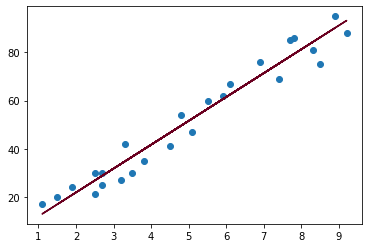

In [11]:
line = regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = '#6a0020',)
plt.show()

### Predicting the scores for the given values in the test set

In [12]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted


In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### plotting the area chart  to compare the values of 'Actual' and 'Predicted'

<AxesSubplot:>

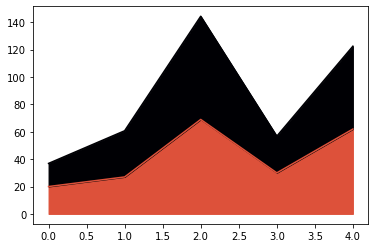

In [14]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4,30))
color
df.plot(kind='area', stacked=True, color=color, legend=False, figsize=(6,4))

### What will be predicted score if a student studies for 9.25 hrs/ day?


In [15]:
no_hours = 9.25
test = np.array([no_hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(no_hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Evaluating the model

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print ('Mean Squared Error:' ,metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


### CONCLUSION

#### I successfully predicted the scores for a student who studies for 9.25 hrs/day which came out to be 93.6917. Also I can able to evaluate the model's performance

## Thankyou